In [1]:
# install.packages("rpart")   # ha nincs meg, akkor ezt kell lefuttatni
library("rpart")

In [2]:
data<-read.csv("globalterrorismdb_0617dist.csv", header = T, sep = ";", skipNul = T)

In [3]:
# Itt adjuk hozzá az osztályozást az adatokhoz
borders <- as.matrix(c(1,5,10,100))
classes<-rep(0,nrow(data))
for (i in 1:nrow(data))
{
  # ha nincs adat az áldozatok számáról, akkor az osztálya -1
  if(is.na(data[i,'nkill']))
    classes[i]<--1
  else
  {
    for (j in 1:nrow(borders)) 
    {
      if (data[i,'nkill']<borders[j])
      {
        classes[i]<-j
        break()
      }
    }
    if(classes[i]==0)
      classes[i]<-5
  }
}

# az adatokat és a hozzájuk tartozó címkéket egy táblázatba tesszük
newdata<-cbind(data,classes)
# kiszűrjük azokat a sorokat, ahol nincs osztályozás
newdata<-newdata[newdata[,'classes']!=-1,]

In [4]:
# az adatok 80%-a lesz a tanítóhalmaz
tr_idx<-sample(nrow(newdata), nrow(newdata)*0.8)
train<-newdata[tr_idx,]
test<-newdata[-tr_idx,]

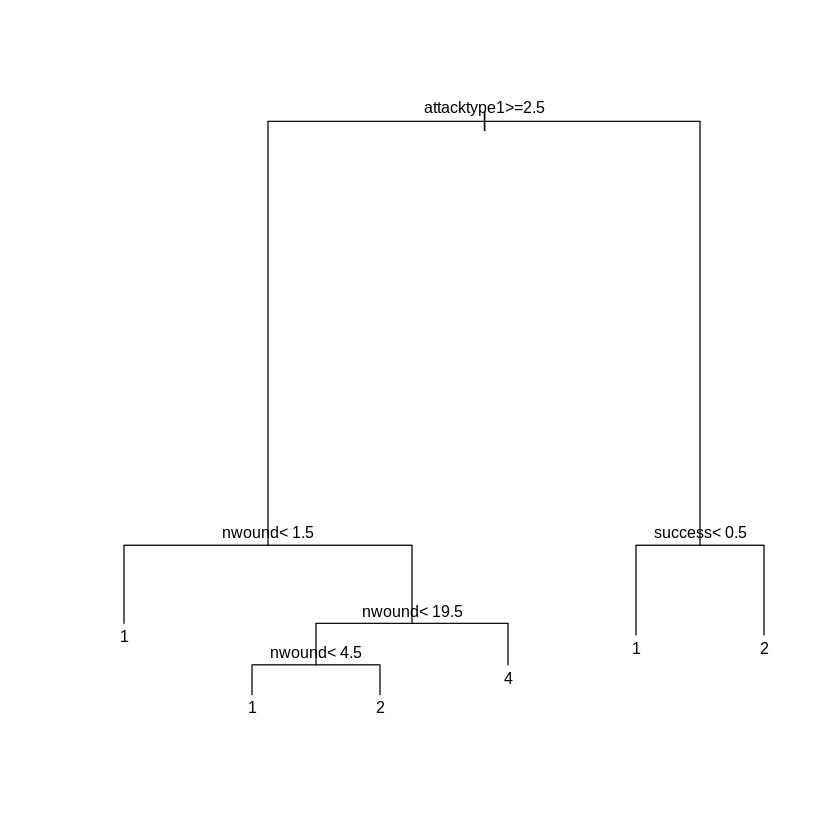

In [5]:
# itt lehet játszani a paraméterekkel: a fa tanítása
tree<-rpart(factor(classes)~eventid+iyear+imonth+iday+extended+country+region+
            specificity+vicinity+crit1+crit2+crit3+doubtterr+multiple+success+
            suicide+attacktype1+targtype1+natlty1+guncertain1+individual+
            weaptype1+property+ishostkid+ransom+INT_LOG+INT_IDEO+INT_MISC+INT_ANY+
            targsubtype1+weapsubtype1+nwound+propextent,data=train)
# kirajzolja a fát
plot(tree)
# szöveggel látja el az ábrát
text(tree,cex=.8)

Tapasztalatok: a **diszkrét numerikus** változókkal jól boldogul az rpart, ezekre a leghatékonyabb. Ide tartoznak az olyan numrikus változók is, amelyeknek nincs nagy értékintervalluma, pl. nwound.

A **numerikus folytonos** változókkal az rpart nagyon küzd, reménytelenül hosszú idő alatt tanul ezekből az értékekből, pl. latitude és longitude attribútumok, és a propvalue is idetartozik, amelynek nagy értékintervalluma van.